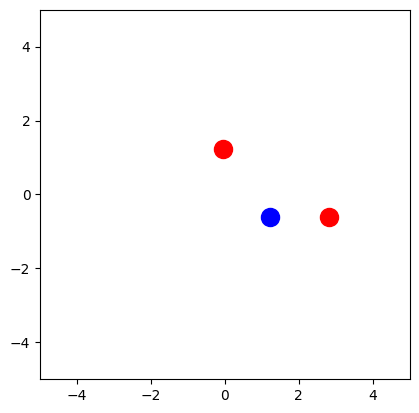

In [20]:
#oefenen met animaties maken

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

BOX_SIZE_0 = 10
N = 20
V_0 = 40
RADIUS = 0.3
dt = 0.001 


class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m
        self.v = np.array(v, dtype=float)
        self.r = np.array(r, dtype=float)
        self.R = np.array(R, dtype=float)
    
    def update_position(self):
        self.r += self.v * dt

def collide_detection(p1: ParticleClass, p2: ParticleClass) -> bool:
    dx = p1.r[0]-p2.r[0]
    dy = p1.r[1]-p2.r[1]
    rr = p1.R + p2.R
    return dx**2+dy**2 < rr**2

def particle_collision(p1: ParticleClass, p2: ParticleClass):
    m1, m2 = p1.m, p2.m
    delta_r = p1.r - p2.r
    delta_v = p1.v - p2.v
    dot_product = np.dot(delta_r, delta_v)

    if dot_product >= 0:
        return
    
    distance_squared = np.dot(delta_r, delta_r)

    p1.v -= 2 * m2 / (m1 + m2) * dot_product / distance_squared * delta_r
    p2.v += 2 * m1 / (m1 + m2) * dot_product / distance_squared * delta_r       

def box_collision(particle: ParticleClass):
    ''' botsing met wanden geeft periodieke randvoorwaarden '''
    for i in range(2):
        if particle.r[i] > BOX_SIZE_0 / 2:
            particle.r[i] -= BOX_SIZE_0 
        elif particle.r[i] < -BOX_SIZE_0 / 2:
            particle.r[i] += BOX_SIZE_0


def handle_collisions(particles):
    """ alle onderlinge botsingen afhandelen voor deeltjes in lijst """
    num_particles = len(particles)
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])

particleA = ParticleClass(m=1.0, v = [V_0, 0], r=[-2, 0.25], R=RADIUS)
particleB = ParticleClass(m=1.0, v = [V_0, 0], r = [-2, -0.25], R=RADIUS)
particleC = ParticleClass(m=1.0, v = [0, 0], r=[0, 0], R=RADIUS)
particle_array = [particleA, particleB, particleC]

fig, ax = plt.subplots()

ax.set_xlim(-BOX_SIZE_0/2, BOX_SIZE_0/2)
ax.set_ylim(-BOX_SIZE_0/2, BOX_SIZE_0/2)
ax.set_aspect('equal')

dot, = ax.plot([], [], 'ro', ms=13);
dotA, = ax.plot([], [], 'ro', ms=13)
dotB, = ax.plot([], [], 'bo', ms=13)
dotC, = ax.plot([], [], 'ro', ms=13)

def init():
    dot.set_data([], [])
    return dot,

def update(frame):
    particleA.update_position()
    particleB.update_position()
    particleC.update_position()

    dotA.set_data([particleA.r[0]], [particleA.r[1]])
    dotB.set_data([particleB.r[0]], [particleB.r[1]])
    dotC.set_data([particleC.r[0]], [particleC.r[1]])

    handle_collisions(particle_array)
    return dot, 
    
ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True, interval=50)
HTML(ani.to_jshtml())



